In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split , StratifiedShuffleSplit , KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(1)

In [2]:
exist = pd.read_excel(r"Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx" , sheet_name="Existing employees")
left = pd.read_excel(r"Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx" , sheet_name="Employees who have left")

In [3]:
exist.dtypes

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [4]:
def encode(data):
    salary_map = {"low":1,
             "medium":2,
             "high":3}
    data["salary"] = data["salary"].map(salary_map)
    data["dept"] = pd.factorize(data["dept"])[0]
    print("Features Encoded Successfully")
encode(exist)
encode(left)

Features Encoded Successfully
Features Encoded Successfully


In [5]:
def has_left(data):
    if data is exist:
        data["Has_left"] = 0
    elif data is left:
        data["Has_left"] = 1
    print("Feature Created")
has_left(exist)
has_left(left)

Feature Created
Feature Created


In [15]:
df = pd.concat([exist,left] , ignore_index=True)
df.drop("Emp ID" ,axis=1, inplace=True)
y = df["Has_left"]
train , test = train_test_split(df,test_size=0.1,shuffle=True,stratify=y , random_state=1)

In [20]:
train.Has_left.value_counts(normalize=True)

0    0.761908
1    0.238092
Name: Has_left, dtype: float64

In [22]:
test.Has_left.value_counts(normalize=True)

0    0.762
1    0.238
Name: Has_left, dtype: float64

In [23]:
X = train.drop("Has_left" , axis=1).values
y = train["Has_left"].values

In [26]:
rf = RandomForestClassifier()
cv = cross_val_score(rf , X,y,scoring="accuracy",cv=5,n_jobs=-1)

In [28]:
tot_score = []
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.1,random_state=1)
for train_index , test_index in sss.split(X,y):
    x_train , x_test = X[train_index] , X[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    
    rf.fit(x_train , y_train)
    pred = rf.predict(x_test)
    score = accuracy_score(y_test , pred)
    tot_score.append(score)

In [29]:
tot_score

[0.9933333333333333,
 0.9896296296296296,
 0.9925925925925926,
 0.997037037037037,
 0.9940740740740741,
 0.9896296296296296,
 0.9948148148148148,
 0.9911111111111112,
 0.9911111111111112,
 0.9888888888888889]

In [30]:
np.mean(cv)

0.9914810149163614

In [31]:
np.mean(tot_score)

0.9922222222222222

##### Test on Unseen Data

In [33]:
test_pred  = rf.predict(test.drop("Has_left",axis=1))

In [34]:
accuracy_score(test["Has_left"] , test_pred)

0.988

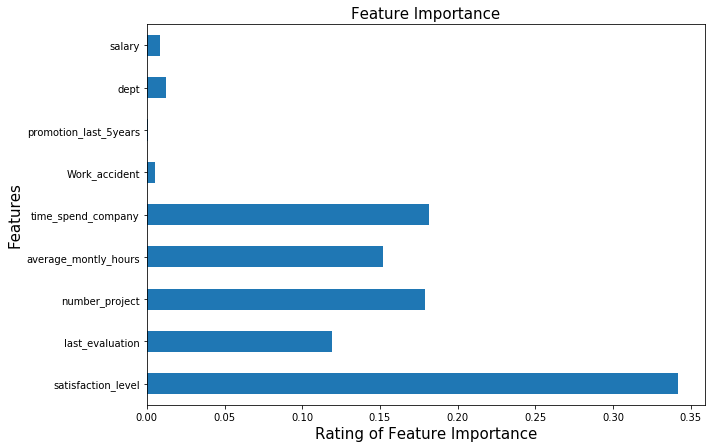

In [44]:
plt.figure(figsize=(10,7))
feat_importance = pd.Series(rf.feature_importances_ , index=train.drop("Has_left" , axis=1).columns)
feat_importance.plot(kind="barh")
plt.savefig("Feature_Imp",quality=100)
plt.title("Feature Importance" , fontsize=15)
plt.xlabel("Rating of Feature Importance" , fontsize=15)
plt.ylabel("Features" , fontsize=15)
plt.show()